In [1]:
"""
Script to test the upsampling.
"""

from floatpy.readers import samrai
import floatpy.upsampling
import numpy

%matplotlib inline
from matplotlib import pyplot as plt
plt.rc("savefig", dpi = 150)


In [2]:
"""
Set the path of the data directory for the data reader.
"""

data_reader = samrai.samraiDataReader()
data_reader.setDataDirectoryPath('/home/manlong/Data/2D_density_wave_advection_AMR/' + \
                                 'viz_2D_density_wave_advection/visit_dump.00100/')


In [3]:
"""
Read the density data from all levels.
"""

data_reader.readSummary()

var_names = ['density']
num_ghosts = numpy.array([0, 0], dtype = numpy.int)
periodic_dimension = numpy.array([False, False], dtype = numpy.bool)

data_reader.readCombinedDataFromAllLevels(var_names, num_ghosts, periodic_dimension)

data_rho = data_reader.getData('density')


In [4]:
"""
Upsample the data.
"""

r = numpy.array([3, 3])

data_upsampled_1 = floatpy.upsampling.upsample(data_rho, r, method = 'second_order_Lagrange')
data_upsampled_2 = floatpy.upsampling.upsample(data_rho, r, method = 'fourth_order_Lagrange')
data_upsampled_3 = floatpy.upsampling.upsample(data_rho, r, method = 'sixth_order_Lagrange')


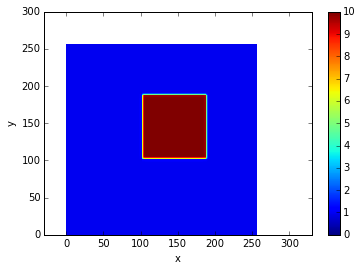

In [5]:
"""
Plot the original data.
"""

data_masked = numpy.ma.masked_where(numpy.isnan(data_rho), data_rho)

plt.pcolormesh(data_masked[0,:,:].T, vmin=0.0, vmax=10.0)
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()


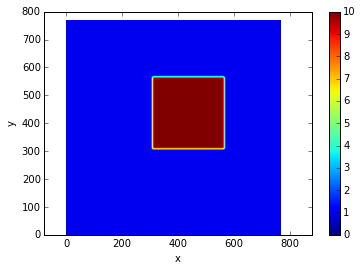

In [6]:
"""
Plot the first upsampled data.
"""

data_masked_1 = numpy.ma.masked_where(numpy.isnan(data_upsampled_1), data_upsampled_1)

plt.pcolormesh(data_masked_1[:,:].T, vmin=0.0, vmax=10.0)
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()


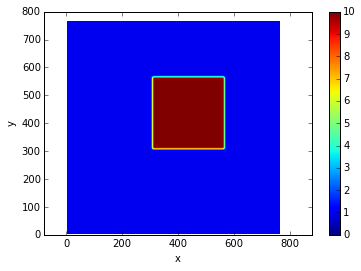

In [ ]:
"""
Plot the second upsampled data.
"""

data_masked_2 = numpy.ma.masked_where(numpy.isnan(data_upsampled_2), data_upsampled_2)

plt.pcolormesh(data_masked_2[:,:].T, vmin=0.0, vmax=10.0)
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()


In [ ]:
"""
Plot the third upsampled data.
"""

data_masked_3 = numpy.ma.masked_where(numpy.isnan(data_upsampled_3), data_upsampled_3)

plt.pcolormesh(data_masked_3[:,:].T, vmin=0.0, vmax=10.0)
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()
